**Identifying features that influence low-income student success**

by Ben Lacar
<br>
March 2019

Next:'
- re-assess correlated features, apply VIF (if greater than 10 then remove)
- update based on feedback


other technical checks:
- try both random forest and linear/ridge regression (add further explanation on RF) - Shagayegh
- apply k-fold cross-validation

Nice to have (later)
- Geospatial data
- Updated census info
- investigate relationship of demographics to COVID cases ([data from NYTimes](https://github.com/nytimes/covid-19-data))

# Introduction

I investigated features of high schools that promote the college eligibility rates of low-income students. The hope is to identify features that can be affected by policy changes to help low income students graduate and become college eligible at a higher rate. I focused on CA public high schools.

To obtain features of schools that could be meaningful for my target, I pulled in data from various sources. I obtained census data for each zip code in the state of CA. I then pulled in information from the CA public schools database. Finally, I used data from GreatSchools both with an API and with custom functions (example of one high school shown [here](https://www.greatschools.org/california/chula-vista/6279-Bonita-Vista-Senior-High-School/#Low-income_students*Graduation_rates*UC_CSU_eligibility)).

In [1]:
# Import packages

# Web scraping
import os
import urllib.request
import requests
from io import StringIO
from bs4 import BeautifulSoup

# Use xml package for GreatSchools data
import xml.etree.ElementTree as ET

# Dataframe munging and statistics
import re
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Data visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

# Stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import multitest

In [2]:
# Colors and formatting
# Google theme html colors from here https://imagecolorpicker.com
B_beige = "#CDA577"
B_brown = "#643E34"
B_slate = "#3F5B66"
B_dkgray = "#5A7E8E"
B_ltgray = "#6D949B"
B_green = "#01CB8B"
B_lime = "#D3F04A"

B_colors = [B_beige, B_brown, B_slate, B_dkgray, B_ltgray, B_green, B_lime]
B_colors_cat = [B_beige, B_green, B_brown, B_ltgray, B_slate, B_lime, B_dkgray]

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

## Import data

In [3]:
parent_path = "/Users/lacar/Documents/Data_science/Jupyter_notebooks/Education_study/"
os.chdir(parent_path)
os.getcwd()

'/Users/lacar/Documents/Data_science/Jupyter_notebooks/Education_study'

<IPython.core.display.Javascript object>

In [8]:
# Import data from data cleaning
df_state_info_gs_census = pd.read_csv(
    "data/b_intermediate/df_state_info_gs_nces_census_enrollment_200428.csv", index_col=0
)

<IPython.core.display.Javascript object>

# Exploratory data analysis

In [18]:
def scatter_plot_open_circles(df, feature_x, feature_y, ax):
    x = df[feature_x]
    y = df[feature_y]
    ax.scatter(x, y, facecolors="none", edgecolors=B_dkgray)
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)

<IPython.core.display.Javascript object>

In [19]:
def hist_plot(df, feature, ax):
    df[feature].hist(ax=ax, bins=30, color=B_slate)
    ax.set_title(feature)

<IPython.core.display.Javascript object>

In [9]:
[print(i) for i in df_state_info_gs_census.columns]

NCESDist
NCESSchool
StatusType
County
District
School
Street
StreetAbr
City
Zip
State
MailStreet
MailStrAbr
MailCity
MailZip
MailState
Phone
Ext
WebSite
OpenDate
ClosedDate
Charter
CharterNum
FundingType
DOC
DOCType
SOC
SOCType
EdOpsCode
EdOpsName
EILCode
EILName
GSoffered
GSserved
Virtual
Magnet
YearRoundYN
FederalDFCDistrictID
Latitude
Longitude
AdmFName1
AdmLName1
AdmEmail1
AdmFName2
AdmLName2
AdmEmail2
AdmFName3
AdmLName3
AdmEmail3
LastUpDate
zip_code
NCESDistSchool
E9
E10
E11
E12
ETOT
D9
D10
D11
D12
DTOT
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
9_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
9_y
%_enrolled_of_total_Not reported
%_dropout_within_Not reported
%_enrolled_of_total_Native Amer/Alaska Native
%_dropout_within_Native Amer/Alaska Native
%_enrolled_of_total_Asian
%_dropout_within_Asian
%_enrolled_of_total_Pacific Islander
%_dropout_within_Pacific Islander
%_enrolled_of_total_Filipino
%_dropout_within_Filipino
%_enrolled_of_total_Hispanic
%_dropout_within_Hispanic
%_enrolled_of_total_African Ame

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

<IPython.core.display.Javascript object>

In [10]:
df_state_info_gs_census["enrollment"].quantile([0.1, 0.2, 0.5, 0.75, 1])

0.10     214.00
0.20     428.80
0.50    1396.00
0.75    2098.25
1.00    8000.00
Name: enrollment, dtype: float64

<IPython.core.display.Javascript object>

In [11]:
df_state_info_gs_census["SOCType"].value_counts()

High Schools (Public)                   1101
K-12 Schools (Public)                      5
Continuation High Schools                  2
Intermediate/Middle Schools (Public)       1
Alternative Schools of Choice              1
Name: SOCType, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
df_state_info_gs_census.sort_values(by="enrollment")[
    [
        "School",
        "SOCType",
        "pct_LI_students",
        "enrollment",
        "graduation_rates_UCCSU_eligibility_LIstudents",
    ]
].head(5)

,School,SOCType,pct_LI_students,enrollment,graduation_rates_UCCSU_eligibility_LIstudents
452,Yosemite Park High,High Schools (Public),NaN,1.0,NaN
1069,South Fork High,High Schools (Public),NaN,4.0,NaN
247,Clear Passage Educational Center,High Schools (Public),NaN,4.0,NaN
1070,Cold Springs High,High Schools (Public),NaN,4.0,NaN
464,Whale Gulch High,High Schools (Public),NaN,9.0,NaN


<IPython.core.display.Javascript object>

In [13]:
# What are the enrollment sizes of the schools with LI graduation rate values?
bool_wotarget = df_state_info_gs_census[
    "graduation_rates_UCCSU_eligibility_LIstudents"
].isna()

df_state_info_gs_census.loc[~bool_wotarget, :].sort_values(by="enrollment").loc[
    :,
    [
        "School",
        "SOCType",
        "pct_LI_students",
        "enrollment",
        "graduation_rates_UCCSU_eligibility_LIstudents",
    ],
].head(10)

,School,SOCType,pct_LI_students,enrollment,graduation_rates_UCCSU_eligibility_LIstudents
732,Baker High,High Schools (Public),92.0,38.0,67.0
1073,Tioga High,High Schools (Public),NaN,53.0,9.0
980,Happy Camp High,High Schools (Public),45.0,62.0,30.0
481,Coleville High,High Schools (Public),NaN,66.0,64.0
870,Shandon High,High Schools (Public),76.0,66.0,8.0
177,Herlong High,High Schools (Public),NaN,66.0,9.0
979,Dunsmuir High,High Schools (Public),NaN,67.0,42.0
438,Sherman Thomas Charter High,High Schools (Public),NaN,68.0,46.0
176,Westwood High,High Schools (Public),NaN,82.0,11.0
462,Potter Valley High,High Schools (Public),NaN,82.0,17.0


<IPython.core.display.Javascript object>

In [14]:
bool_wotarget.sum()

102

<IPython.core.display.Javascript object>

## Filter by schools with at least 50 students



In [15]:
df_state_info_gs_census = df_state_info_gs_census[
    df_state_info_gs_census["enrollment"] >= 50
].copy()

<IPython.core.display.Javascript object>

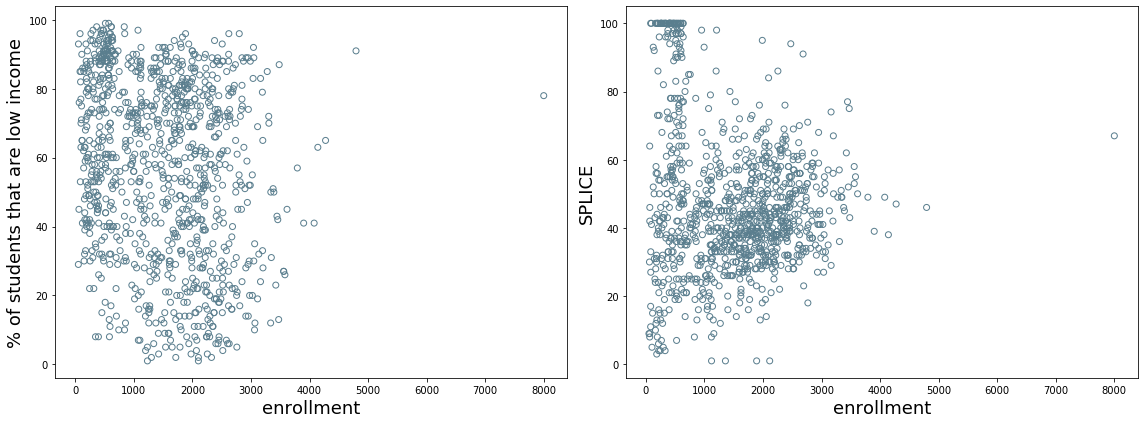

<IPython.core.display.Javascript object>

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
scatter_plot_open_circles(df_state_info_gs_census, "enrollment", "pct_LI_students", ax1)

scatter_plot_open_circles(
    df_state_info_gs_census,
    "enrollment",
    "graduation_rates_UCCSU_eligibility_LIstudents",
    ax2,
)

ax1.set_xlabel("enrollment", fontsize=18)
ax1.set_ylabel("% of students that are low income", fontsize=18)
ax2.set_xlabel("enrollment", fontsize=18)
ax2.set_ylabel("SPLICE", fontsize=18)
plt.tight_layout()

## Exploration of SPLICE and most correlated features with SPLICE

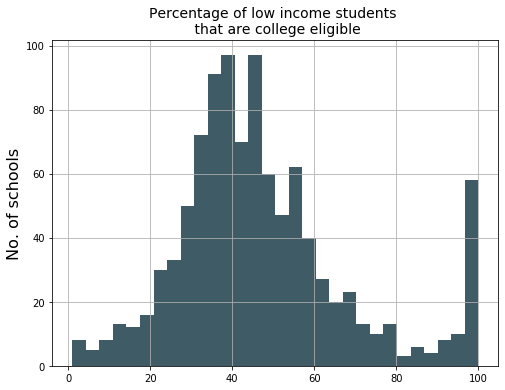

<IPython.core.display.Javascript object>

In [21]:
f, ax1 = plt.subplots(figsize=(8,6))
hist_plot(df_state_info_gs_census, "graduation_rates_UCCSU_eligibility_LIstudents", ax1)
ax1.set_ylabel("No. of schools", fontsize=16)
ax1.set_title("Percentage of low income students \n that are college eligible", fontsize=14);


In [22]:
df_state_info_gs_census[
    "graduation_rates_UCCSU_eligibility_allStudents"
] * df_state_info_gs_census["pct_LI_students"] / 100

0       67.00
1       11.88
2         NaN
3       80.00
4       10.71
        ...  
1105    26.46
1106    26.04
1107    29.48
1108    20.46
1109    19.24
Length: 1088, dtype: float64

<IPython.core.display.Javascript object>

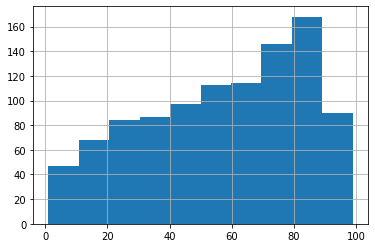

<IPython.core.display.Javascript object>

In [23]:
df_state_info_gs_census["pct_LI_students"].hist()

ValueError: Could not interpret input 'Charter_cat_encoded'

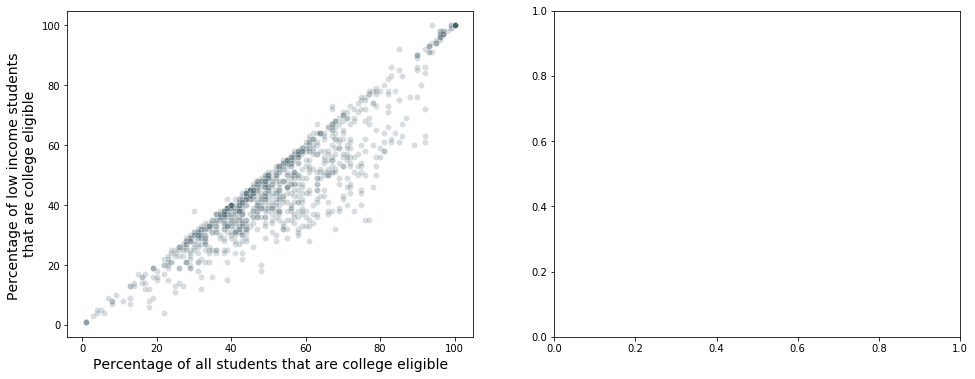

<IPython.core.display.Javascript object>

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(
    data=df_state_info_gs_census,
    x="graduation_rates_UCCSU_eligibility_allStudents",
    y="graduation_rates_UCCSU_eligibility_LIstudents",
    ax=ax1,
    alpha=0.2,
    color=B_slate,
    legend=False,
)
ax1.set_xlabel("Percentage of all students that are college eligible", fontsize=14)
ax1.set_ylabel(
    "Percentage of low income students \nthat are college eligible", fontsize=14
)


sns.boxplot(
    data=df_state_info_gs_census,
    x="Charter_cat_encoded",
    y="graduation_rates_UCCSU_eligibility_LIstudents",
    palette=[B_beige, B_green],
)
ax2.set_xlabel("Charter status", fontsize=14)
ax2.set_ylabel(
    "Percentage of low income students \nthat are college eligible", fontsize=14
)
plt.tight_layout()
;

In [381]:
df_state_info_gs_census.columns[df_state_info_gs_census.columns.str.contains("income")]

Index(['low_income',
       'Est.; INCOME_BENEFITS - Total households - Median household income ($)',
       'Est.; INCOME_BENEFITS - Total households - Mean household income ($)',
       'Est.; INCOME_BENEFITS - w/ Social Security - Mean Social Security income ($)',
       'Est.; INCOME_BENEFITS - w/ retirement income',
       '%; INCOME_BENEFITS - w/ retirement income_x',
       'Est.; INCOME_BENEFITS - w/ retirement income - Mean retirement income ($)',
       'Est.; INCOME_BENEFITS - w/ cash public assistance income',
       '%; INCOME_BENEFITS - w/ cash public assistance income_x',
       'Est.; INCOME_BENEFITS - w/ cash public assistance income - Mean cash public assistance income ($)',
       'Est.; INCOME_BENEFITS - Families - Median family income ($)',
       'Est.; INCOME_BENEFITS - Families - Mean family income ($)',
       'Est.; INCOME_BENEFITS - Per capita income ($)',
       'Est.; INCOME_BENEFITS - Nonfamily households - Median nonfamily income ($)',
       'Est.; INCOM

<IPython.core.display.Javascript object>

''

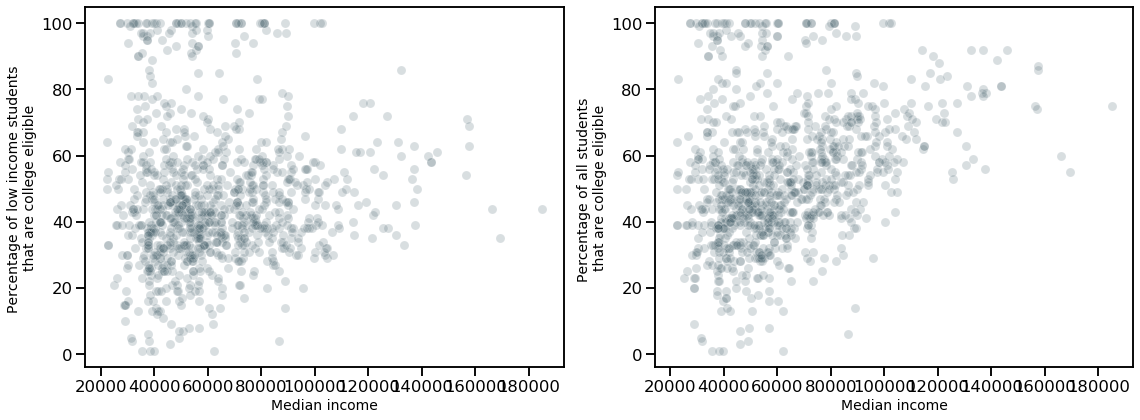

<IPython.core.display.Javascript object>

In [382]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# scatter_plot_open_circles(
#     df_state_info_gs_census,
#     "graduation_rates_UCCSU_eligibility_allStudents",
#     "graduation_rates_UCCSU_eligibility_LIstudents",
#     ax1,
# )

sns.scatterplot(
    data=df_state_info_gs_census,
    x="Est.; INCOME_BENEFITS - Total households - Median household income ($)",
    y="graduation_rates_UCCSU_eligibility_LIstudents",
    ax=ax1,
    alpha=0.2,
    color=B_slate,
    legend=False,
)
ax1.set_xlabel("Median income", fontsize=14)
ax1.set_ylabel(
    "Percentage of low income students \nthat are college eligible", fontsize=14
)


sns.scatterplot(
    data=df_state_info_gs_census,
    x="Est.; INCOME_BENEFITS - Total households - Median household income ($)",
    y="graduation_rates_UCCSU_eligibility_allStudents",
    ax=ax2,
    alpha=0.2,
    color=B_slate,
    legend=False,
)
ax2.set_xlabel("Median income", fontsize=14)
ax2.set_ylabel("Percentage of all students \nthat are college eligible", fontsize=14)

plt.tight_layout()
;

In [188]:
df_state_info_gs_census["Charter_cat_encoded"].sum()

179

<IPython.core.display.Javascript object>

mean:  46.648727984344426
mean +/- 1SD:  25.935753315454775 67.36170265323408
mean + 2SD:  5.222778646565125 88.07467732212373


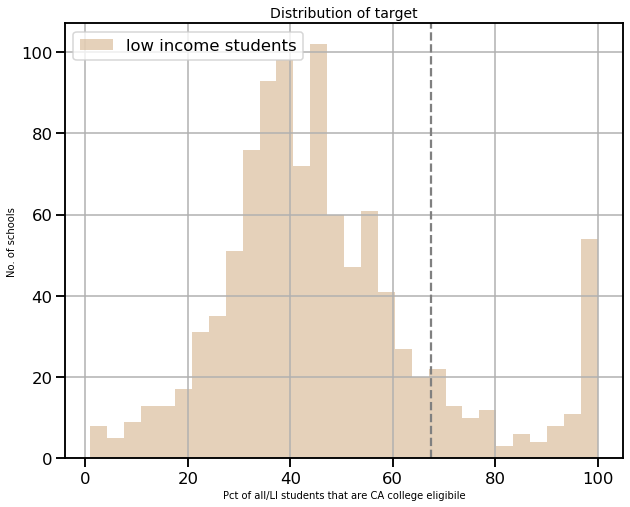

<IPython.core.display.Javascript object>

In [383]:
f, ax1 = plt.subplots(figsize=(10, 8))
df_state_info_gs_census["graduation_rates_UCCSU_eligibility_LIstudents"].hist(
    bins=30, ax=ax1, color=B_beige, alpha=0.5, label="low income students"
)
# df_state_info_gs_census["graduation_rates_UCCSU_eligibility_allStudents"].hist(
#     bins=30, ax=ax1, color=B_green, alpha=0.5, label="all students"
# )

ax1.axvline(67.4, c="gray", linestyle="dashed")
ax1.set_title("Distribution of target")
ax1.set_xlabel("Pct of all/LI students that are CA college eligibile")
ax1.set_ylabel("No. of schools")
ax1.legend()

target = df_state_info_gs_census["graduation_rates_UCCSU_eligibility_LIstudents"]
target_mean = target.mean()
target_sd = target.std()

print("mean: ", target_mean)
print("mean +/- 1SD: ", target_mean - target_sd, target_mean + target_sd)
print("mean + 2SD: ", target_mean - 2 * target_sd, target_mean + 2 * target_sd)

## Exploration of gap and features correlated with gap

mean:  11.273027246803332
mean +/- 1SD:  0.02382453794723638 22.522229955659427
mean + 2SD:  -11.22537817090886 33.77143266451552


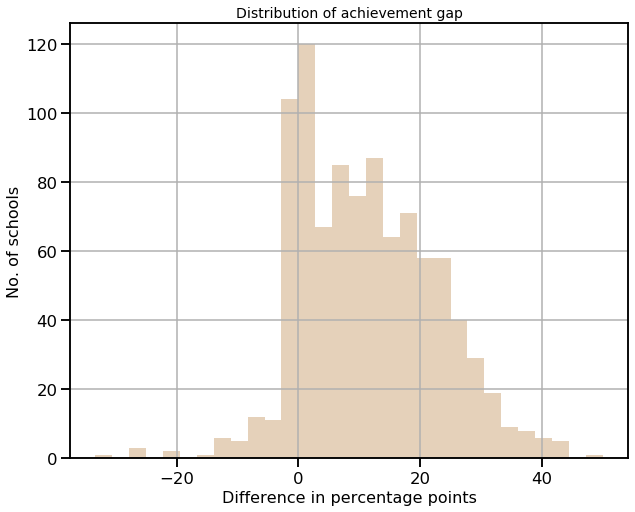

<IPython.core.display.Javascript object>

In [394]:
f, ax1 = plt.subplots(figsize=(10, 8))
df_state_info_gs_census["nonLI-LI_UCCSU_eligibility_gap"].hist(
    bins=30, ax=ax1, color=B_beige, alpha=0.5
)
# df_state_info_gs_census["graduation_rates_UCCSU_eligibility_allStudents"].hist(
#     bins=30, ax=ax1, color=B_green, alpha=0.5, label="all students"
# )

# ax1.axvline(67.4, c="gray", linestyle="dashed")
ax1.set_title("Distribution of achievement gap")
ax1.set_xlabel("Difference in percentage points", fontsize=16)
ax1.set_ylabel("No. of schools", fontsize=16)
# ax1.legend()

target = df_state_info_gs_census["nonLI-LI_UCCSU_eligibility_gap"]
target_mean = target.mean()
target_sd = target.std()

print("mean: ", target_mean)
print("mean +/- 1SD: ", target_mean - target_sd, target_mean + target_sd)
print("mean + 2SD: ", target_mean - 2 * target_sd, target_mean + 2 * target_sd)

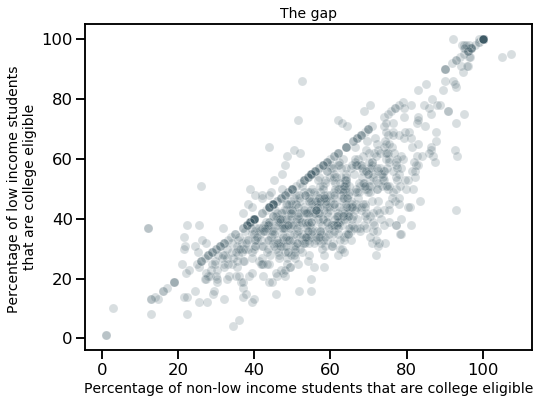

<IPython.core.display.Javascript object>

In [393]:
f, (ax1) = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(
    data=df_state_info_gs_census,
    x="graduation_rates_UCCSU_eligibility_nonLIstudents",
    y="graduation_rates_UCCSU_eligibility_LIstudents",
    ax=ax1,
    alpha=0.2,
    color=B_slate,
    legend=False,
)

ax1.axabline(
    
)


ax1.set_xlabel(
    "Percentage of non-low income students that are college eligible", fontsize=14
)
ax1.set_ylabel(
    "Percentage of low income students \nthat are college eligible", fontsize=14
)
ax1.set_title(
    "The gap", fontsize=14
);


# ---